<a href="https://colab.research.google.com/github/topguns837/workpiece_detection/blob/master/workpiece_detection_yolov5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import random
import cv2
from google.colab.patches import cv2_imshow
from tqdm.auto import tqdm
import os
import shutil as sh
from IPython.display import Image, clear_output
import torch

In [2]:
%%time

!git clone https://github.com/ultralytics/yolov5
!pip install -U pycocotools
!pip install -qr yolov5/requirements.txt  
!cp yolov5/requirements.txt ./
!pip install wandb

Cloning into 'yolov5'...
remote: Enumerating objects: 12927, done.
remote: Counting objects: 100% (309/309), done.
remote: Compressing objects: 100% (147/147), done.
remote: Total 12927 (delta 194), reused 265 (delta 162), pack-reused 12618
Receiving objects: 100% (12927/12927), 12.68 MiB | 16.88 MiB/s, done.
Resolving deltas: 100% (8847/8847), done.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 596 kB 5.1 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.8 MB 5.1 MB/s 
     |████████████████████████████████| 157 kB 63.1 MB/s 
     |████████████████████████████████| 181 kB 69.7 MB/s 
     |████████████████████████████████| 63 kB 2.0 MB/s 
     |████████████████████████████████| 157 kB 59.4 MB/s 
     |████████████████████████████████| 157 kB 62.7 MB/s 
     |████████████████████████████████| 157 kB 

In [6]:
import wandb
wandb.login()

True

In [7]:
!python yolov5/train.py --img 640 --batch 16 --epochs 10 --data /content/drive/MyDrive/yolo_v5/data.yaml 

wandb: Currently logged in as: topguns837. Use `wandb login --relogin` to force relogin
train: weights=yolov5/yolov5s.pt, cfg=, data=/content/drive/MyDrive/yolo_v5/data.yaml, hyp=yolov5/data/hyps/hyp.scratch-low.yaml, epochs=10, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=yolov5/runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.1-394-gd7bc5d7 Python-3.7.13 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_b

In [ ]:
!python yolov5/export.py --weights  yolov5/runs/train/exp/weights/best.pt --include onnx

export: data=yolov5/data/coco128.yaml, weights=['yolov5/runs/train/exp/weights/best.pt'], imgsz=[640, 640], batch_size=1, device=cpu, half=False, inplace=False, train=False, keras=False, optimize=False, int8=False, dynamic=False, simplify=False, opset=12, verbose=False, workspace=4, nms=False, agnostic_nms=False, topk_per_class=100, topk_all=100, iou_thres=0.45, conf_thres=0.25, include=['onnx']
YOLOv5 🚀 v6.1-295-gf8722b4 Python-3.7.13 torch-1.11.0+cu102 CPU

Fusing layers... 
Model summary: 213 layers, 7018216 parameters, 0 gradients, 15.8 GFLOPs

PyTorch: starting from yolov5/runs/train/exp/weights/best.pt with output shape (1, 25200, 8) (13.7 MB)
requirements: onnx not found and is required by YOLOv5, attempting auto-update...
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/

requirements: 1 package updated per ['onnx']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect


ONNX: starting export with onnx 1.12

In [ ]:
!python yolov5/export.py --weights yolov5/runs/train/exp/weights/best.pt --include torchscript onnx --simplify

export: data=yolov5/data/coco128.yaml, weights=['yolov5/runs/train/exp/weights/best.pt'], imgsz=[640, 640], batch_size=1, device=cpu, half=False, inplace=False, train=False, keras=False, optimize=False, int8=False, dynamic=False, simplify=True, opset=12, verbose=False, workspace=4, nms=False, agnostic_nms=False, topk_per_class=100, topk_all=100, iou_thres=0.45, conf_thres=0.25, include=['torchscript', 'onnx']
YOLOv5 🚀 v6.1-294-g574ceed Python-3.7.13 torch-1.11.0+cu102 CPU

Traceback (most recent call last):
  File "yolov5/export.py", line 608, in <module>
    main(opt)
  File "yolov5/export.py", line 603, in main
    run(**vars(opt))
  File "/usr/local/lib/python3.7/dist-packages/torch/autograd/grad_mode.py", line 27, in decorate_context
    return func(*args, **kwargs)
  File "yolov5/export.py", line 489, in run
    model = attempt_load(weights, device=device, inplace=True, fuse=True)  # load FP32 model
  File "/content/yolov5/models/experimental.py", line 80, in attempt_load
    ckpt

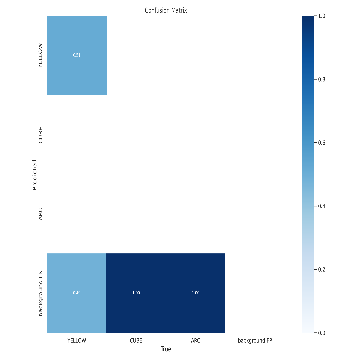

In [12]:
img = cv2.imread('/content/yolov5/runs/train/exp2/confusion_matrix.png')
img = cv2.resize(img,(360,360))
cv2_imshow(img)

In [9]:
df = pd.read_csv('/content/yolov5/runs/train/exp2/results.csv')
df.head()

,epoch,train/box_loss,train/obj_loss,train/cls_loss,metrics/precision,metrics/recall,metrics/mAP_0.5,metrics/mAP_0.5:0.95,val/box_loss,val/obj_loss,val/cls_loss,x/lr0,x/lr1,x/lr2
0,0,0.101920,0.023268,0.037522,0.023258,0.20909,0.031480,0.007462,0.026448,0.016499,0.010774,0.078400,0.002400,0.002400
1,1,0.073740,0.018256,0.026934,0.363680,0.17662,0.072582,0.024208,0.019929,0.012820,0.006117,0.055415,0.004415,0.004415
2,2,0.061419,0.016957,0.016748,0.396290,0.30676,0.087562,0.030124,0.021907,0.009662,0.002686,0.031935,0.005935,0.005935
3,3,0.060906,0.015630,0.011218,0.741460,0.15789,0.102700,0.045121,0.020922,0.008021,0.001581,0.007960,0.006960,0.006960
4,4,0.054285,0.013748,0.008961,0.083660,0.56246,0.148640,0.064272,0.016433,0.008374,0.001453,0.006040,0.006040,0.006040
